In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Task 1

> Pасчет оценок максимального правдоподобия для различных объемов выборок с вычислением смещения (```bias_results```), дисперсии (```variance_results```), среднеквадратичной ошибки (```mse_results```) и количества выборок с оценкой параметра выше установленного порога (```out_of_threshold```)

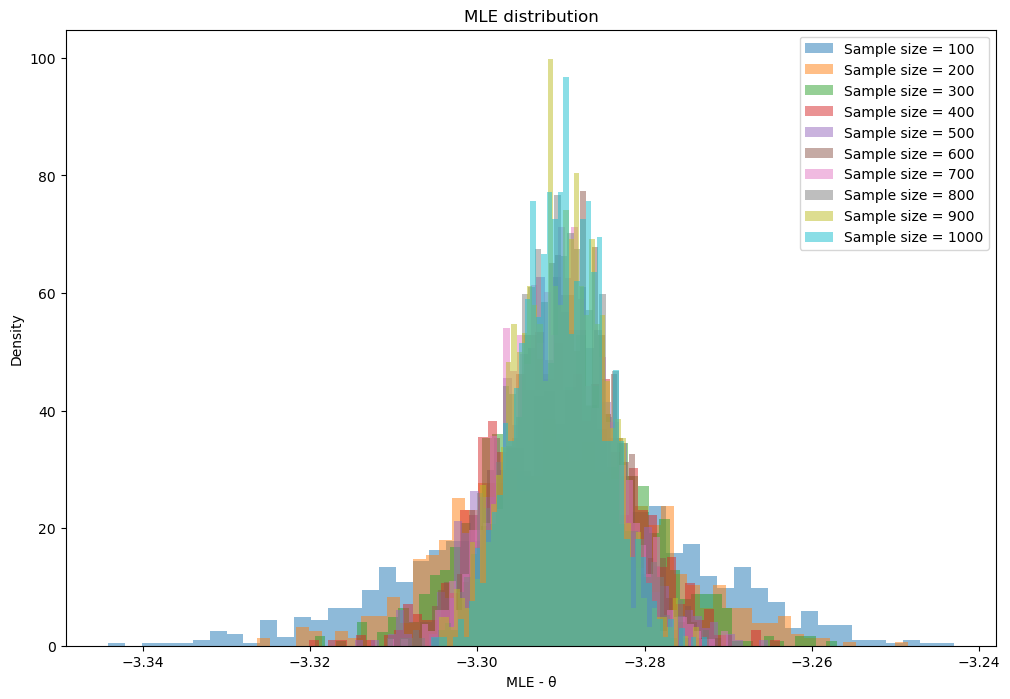

Bias: [-3.29031492 -3.28999381 -3.28980555 -3.29030033 -3.29045791 -3.28988696
 -3.29023481 -3.29014689 -3.29022456 -3.28978786]
Variance: [2.60503323e-04 1.34185062e-04 8.58772402e-05 6.59255823e-05
 4.98904544e-05 4.16935386e-05 3.95758610e-05 3.39771672e-05
 2.90137746e-05 2.52845902e-05]
MSE: [10.82643277 10.82419345 10.82290645 10.82614221 10.82716312 10.82339788
 10.82568469 10.82510055 10.82560667 10.82272944]
Out of threshold: [270. 201. 128. 107.  96.  65.  58.  42.  37.  17.]


In [35]:

def f_theta(x, theta):
    return (3 * x**2 / np.sqrt(2 * np.pi)) * np.exp(-((theta - x**3)**2) / 2)

def log_likelihood(x, theta):
    return np.sum(np.log(f_theta(x, theta)))


# дифф по тете и получил вот ето
def mle(x):
    return np.cbrt(np.mean(x**3))


theta = 5
n_list = [i * 100 for i in range(1,11)]
m = 1000
threshold = 3.3

# Задает массивы для хранения результатов.
mle_results = np.zeros((len(n_list), m))
bias_results = np.zeros(len(n_list))
variance_results = np.zeros(len(n_list))
mse_results = np.zeros(len(n_list))
out_of_threshold = np.zeros(len(n_list))

for i, n in enumerate(n_list):
    for j in range(m):

        u = np.random.uniform(0, 1, n)
        x = np.cbrt(np.sqrt(2) * stats.norm.ppf(u) + theta)


        mle_results[i, j] = mle(x)


    bias_results[i] = np.mean(mle_results[i, :]) - theta
    variance_results[i] = np.var(mle_results[i, :])
    mse_results[i] = np.mean((mle_results[i, :] - theta)**2)

    #проверка абсолютной ошибки
    out_of_threshold[i] = np.sum(np.abs(mle_results[i, :] - theta) > threshold)


plt.figure(figsize=(12, 8))
for i, n in enumerate(n_list):
    plt.hist((mle_results[i, :] - theta), bins=50, density=True, alpha=0.5, label=f"Sample size = {n}")
plt.legend()
plt.xlabel("MLE - θ")
plt.ylabel("Density")
plt.title("MLE distribution")
plt.show()

print("Bias:", bias_results)
print("Variance:", variance_results)
print("MSE:", mse_results)
print("Out of threshold:", out_of_threshold)


- значения MSE высокие и остаются сравнительно стабильными по разным размерам выборки, что может объясняться сильным смещением оценки
- количество оценок, выходящих за пределы порога, уменьшается с увеличением размера выборки, что указывает на улучшение точности оценок при больших объемах данных


# Task 2

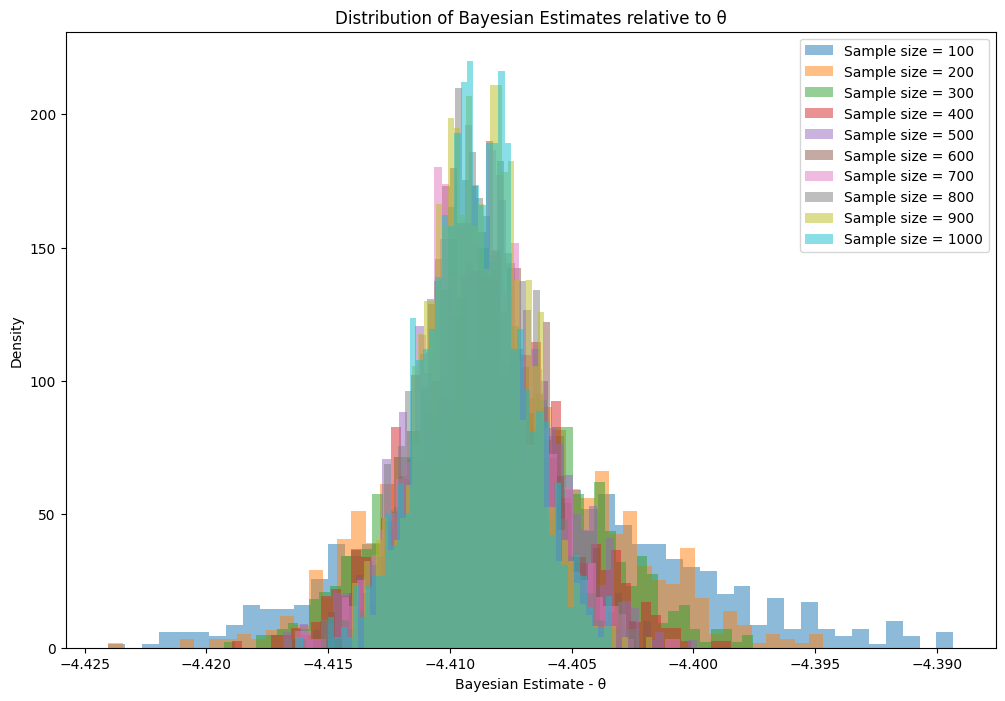

Bayesian Bias: [-4.40705859 -4.40786283 -4.40833251 -4.40868797 -4.40865041 -4.40879394
 -4.40886607 -4.40891881 -4.40888341 -4.40896955]
Bayesian Variance: [3.57520978e-05 1.98742423e-05 1.28878981e-05 9.17306118e-06
 7.30256048e-06 5.62902893e-06 5.53310356e-06 5.02783907e-06
 3.98356897e-06 4.21135444e-06]
Bayesian MSE: [19.42220116 19.42927461 19.43340838 19.43653875 19.43620572 19.4374696
 19.43810558 19.43857012 19.43825688 19.43901672]


In [13]:
theta = 5
k_prior = 1
lambda_prior = 1
n_list = [i * 100 for i in range(1,11)]
m = 1000

# prior distribution for theta is a gamma distribution with parameters k and lambda
prior = stats.gamma(a=k_prior, scale=1/lambda_prior)
prior_pdf = prior.pdf

# to compute the bayesian estimate, we need to find the posterior distribution
# which is proportional to the likelihood * prior
# for the given likelihood and prior, the posterior is also a gamma distribution

# update the posterior parameters based on the data
def update_posterior_params(x, k_prior, lambda_prior):
    # sum of x will be used to update the lambda parameter
    # number of x will be used to update the k parameter
    lambda_post = lambda_prior + np.sum(x)
    k_post = k_prior + len(x)
    return k_post, lambda_post


def simulate_bayesian_estimation(n_list, m, theta, k_prior, lambda_prior):
    # bayesian estimate of theta is the mean of the posterior distribution
    # the mean is k/lambda.

    # simulate the experiment using the same scheme as in the mle experiment
    bayes_estimates = np.zeros((len(n_list), m))
    for i, n in enumerate(n_list):
        for j in range(m):
            u = np.random.uniform(0, 1, n)
            x = np.cbrt(np.sqrt(2) * stats.norm.ppf(u) + theta)  # data generation
            k_post, lambda_post = update_posterior_params(x, k_prior, lambda_prior)
            posterior_mean = k_post / lambda_post
            bayes_estimates[i, j] = posterior_mean

    # calculate the bias, variance, and mse for the bayesian estimates
    bayes_bias = np.zeros(len(n_list))
    bayes_variance = np.zeros(len(n_list))
    bayes_mse = np.zeros(len(n_list))

    for i, n in enumerate(n_list):
        bayes_bias[i] = np.mean(bayes_estimates[i, :]) - theta
        bayes_variance[i] = np.var(bayes_estimates[i, :])
        bayes_mse[i] = np.mean((bayes_estimates[i, :] - theta)**2)

    return bayes_estimates, bayes_bias, bayes_variance, bayes_mse

bayes_estimates, bayes_bias, bayes_variance, bayes_mse = simulate_bayesian_estimation(n_list, m, theta, k_prior, lambda_prior)

# (bayes_estimates, bayes_bias, bayes_variance, bayes_mse)

plt.figure(figsize=(12, 8))
for i, n in enumerate(n_list):
    plt.hist((bayes_estimates[i, :] - theta), bins=50, density=True, alpha=0.5, label=f"Sample size = {n}")
plt.legend()
plt.xlabel("Bayesian Estimate - θ")
plt.ylabel("Density")
plt.title("Distribution of Bayesian Estimates relative to θ")
plt.show()

print("Bayesian Bias:", bayes_bias)
print("Bayesian Variance:", bayes_variance)
print("Bayesian MSE:", bayes_mse)


- дисперсия уменьшается с увеличением размера выборки, что указывает на повышение точности оценки с увеличением объема данных